In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from math import pi
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
from celluloid import Camera
import matplotlib.animation as animation

In [2]:
df = pd.read_csv('Master_df.csv',index_col = 0)

In [3]:
kershaw = df[df['Name'] == 'Mark Buehrle']
kershaw.sort_values(by=['Age'], inplace = True)
kershaw.reset_index(drop = True, inplace = True)
kershaw

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Season,Name,Team,W,L,SV,G,GS,IP,K/9,...,WHIP,IP/G,Pitch Diversity,Shannon Diversity,Strikeouts,Control,Stamina/Consistency,BA Against,Velocity,Ground Balls
0,2002,Mark Buehrle,White Sox,19,12,0,34,34,239.0,5.05,...,1.24,7.03,55.000000,0.913042,24.500000,80.500000,97.750000,70.250000,25.750000,74.250000
1,2003,Mark Buehrle,White Sox,14,14,0,35,35,230.1,4.65,...,1.35,6.57,67.281106,1.054807,20.737327,74.654378,89.631336,44.930876,16.589862,60.368664
2,2004,Mark Buehrle,White Sox,16,10,0,35,35,245.1,6.05,...,1.26,7.00,100.000000,1.385798,55.752212,91.592920,97.566372,47.566372,15.929204,78.539823
3,2005,Mark Buehrle,White Sox,16,8,0,33,33,236.2,5.67,...,1.18,7.16,96.929825,1.346885,46.929825,94.736842,99.122807,55.701754,12.061404,64.035088
4,2006,Mark Buehrle,White Sox,12,13,0,32,32,204.0,4.32,...,1.45,6.38,97.881356,1.397846,16.737288,85.381356,86.016949,40.889831,7.203390,59.322034
5,2007,Mark Buehrle,White Sox,10,9,0,30,30,201.0,5.15,...,1.26,6.70,97.520661,1.402369,33.884298,90.495868,96.280992,67.148760,9.917355,53.305785
6,2008,Mark Buehrle,White Sox,15,12,0,34,34,218.2,5.76,...,1.34,6.42,96.052632,1.324742,43.640351,84.649123,90.570175,30.043860,11.184211,82.236842
7,2009,Mark Buehrle,White Sox,13,10,0,33,33,213.1,4.43,...,1.25,6.46,97.046414,1.331536,11.181435,91.561181,90.295359,69.198312,3.375527,65.822785
8,2010,Mark Buehrle,White Sox,13,13,0,33,33,210.1,4.24,...,1.40,6.37,89.302326,1.265147,5.581395,87.209302,81.162791,31.395349,6.511628,60.232558
9,2011,Mark Buehrle,White Sox,13,9,0,31,31,205.1,4.78,...,1.30,6.62,95.045045,1.349283,13.963964,86.036036,90.540541,49.099099,3.828829,55.630631


In [4]:
plotdf1 = kershaw[['Name', 'Strikeouts','Velocity','Pitch Diversity', 'Control', 'Stamina/Consistency','Ground Balls',  'WAR', 'Age']]
plotdf1.sort_values(by=['Age'], inplace = True)
plotdf1.reset_index(drop=True, inplace=True)
plotdf1

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Strikeouts,Velocity,Pitch Diversity,Control,Stamina/Consistency,Ground Balls,WAR,Age
0,Mark Buehrle,24.500000,25.750000,55.000000,80.500000,97.750000,74.250000,4.3,23
1,Mark Buehrle,20.737327,16.589862,67.281106,74.654378,89.631336,60.368664,4.3,24
2,Mark Buehrle,55.752212,15.929204,100.000000,91.592920,97.566372,78.539823,4.5,25
3,Mark Buehrle,46.929825,12.061404,96.929825,94.736842,99.122807,64.035088,5.9,26
4,Mark Buehrle,16.737288,7.203390,97.881356,85.381356,86.016949,59.322034,1.7,27
5,Mark Buehrle,33.884298,9.917355,97.520661,90.495868,96.280992,53.305785,3.3,28
6,Mark Buehrle,43.640351,11.184211,96.052632,84.649123,90.570175,82.236842,4.2,29
7,Mark Buehrle,11.181435,3.375527,97.046414,91.561181,90.295359,65.822785,3.0,30
8,Mark Buehrle,5.581395,6.511628,89.302326,87.209302,81.162791,60.232558,3.8,31
9,Mark Buehrle,13.963964,3.828829,95.045045,86.036036,90.540541,55.630631,3.1,32


In [5]:
# verlander = combined[combined['Name'] == 'Justin Verlander']
# verlander.sort_values(by=['Age'], inplace = True)
# verlander.reset_index(drop = True, inplace = True)
# verlander

In [6]:
# plotdf = verlander[['Name', 'Strikeouts','Velocity', 'Control','Stamina/Consistency', 'BA Against', 'Ground Balls', 'WAR', 'Age']]
# plotdf.sort_values(by=['Age'], inplace = True)
# plotdf.reset_index(drop=True, inplace=True)
# plotdf

In [15]:
pitches = kershaw.loc[:,'FB%':'KN%']
pitches.dropna(axis = 1, thresh = int(len(pitches)*0.8), inplace = True)
pitches['Age'] = kershaw['Age']
pitches.fillna(0, inplace = True)
pitches

,FB%,SL%,CB%,CH%,Age
0,71.3,0.0,23.1,5.6,20
1,71.9,6.8,16.9,4.4,21
2,71.6,19.6,7.0,1.8,22
3,65.3,25.5,5.4,3.8,23
4,62.0,23.1,11.3,3.7,24
5,60.7,24.5,12.5,2.4,25
6,55.4,29.4,14.3,0.9,26
7,53.9,27.5,18.2,0.4,27
8,50.7,33.3,15.6,0.4,28
9,47.1,34.9,16.8,1.2,29


In [ ]:
len(pitches.columns)

In [6]:
def radar(num_vars, frame = 'circle'):
    '''
    num_vars = # of variables
    frame = shape of frame (default = circle)
    '''
    
    # create evenly spaced vertices starting at 0, ending at 2*pi (360deg) for 'num_vars' times
    theta = np.linspace(0, 2*np.pi, num = num_vars, endpoint = False)
    
    class RadarAxes(PolarAxes):
        
        name = 'radar'
        # variable # of args
        # kwags for variable keyworded argument list
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # set first axis @ 90 degrees (ie. at top)
            self.set_theta_zero_location('N')
        
        def fill(self, *args, closed = True, **kwargs):
            # make line closed by default
            return super().fill(closed = closed, *args, **kwargs)
        
        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)
                
        # add labels at their corresponding degrees        
        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        # how to create frame
        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)
        
        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)
            
        
        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)
    register_projection(RadarAxes)
    return theta

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


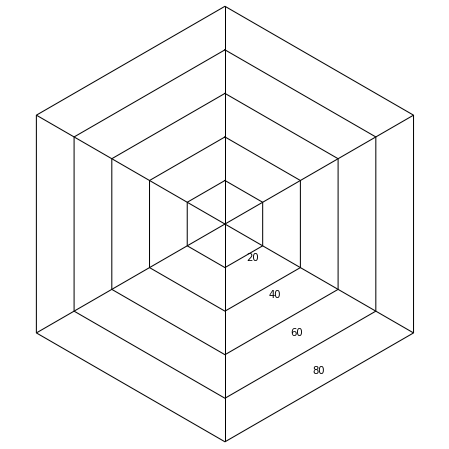

In [17]:
N = 6

x_as = [n / float(N) * 2 * pi for n in range(N)]

theta = radar(N, frame = 'polygon')
theta

# Set color of axes
plt.rc('axes', linewidth=1, edgecolor="black", facecolor = "white")

ages = []
lines = []

# Create polar plot
fig, ax = plt.subplots(figsize=(8,8), sharex = True, sharey= True, subplot_kw = dict(projection='radar'))
#ax = ax.flat
plt.setp(ax, yticks = [20, 40, 60, 80], yticklabels = ["20", "40", "60", "80"])

# Set canvas colour
#fig.patch.set_facecolor('xkcd:mint green')
camera = Camera(fig)
for j in range(len(plotdf1)):
    # Set data
    x = np.array(plotdf1.columns[1:-2].values)
    y = np.array(pd.to_numeric(plotdf1.iloc[j,1:-2].values))
    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)


    # Set position of radial-labels
    #ax.set_rticks([0, 20, 40, 60, 80, 100])
    ax.set_rlabel_position(150)


    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="black", linestyle='solid', linewidth=1)
    ax.yaxis.grid(True, color="black", linestyle='solid', linewidth=1)


    # Set number of radial axes and remove labels
    plt.xticks(x_as[:], [])


    # Plot data
    line = plt.plot(x_as, y, linewidth=1.5, color = 'b', linestyle='solid', zorder=3)
    # Fill area
    ax.fill(x_as, y, 'lightblue', alpha=0.95)

    # Set axes limits
    plt.ylim(0, 100)
    #plt.yticks([0, 20, 40, 60, 80, 100], ["0", "20", "40", "60", "80", "100"])
    
    # Add title
    #ax.set_title(f'{plotdf11.loc[j, "Name"]} (WAR: {plotdf11.loc[j, "WAR"]})', position=(0.5, 1.05), horizontalalignment='center', verticalalignment='center')
    
    # Adjust positioning of vertex labels based on their position from 0 - 2pi (circle)
    for i in range(N):
        # Calculate angles of the 6 vertices
        angle_rad = i / float(N) * 2 * pi
        # At top center
        if angle_rad == 0:
            ha, distance_ax = "center", 5
        # On right side
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 3
        # On bottom
        elif angle_rad == pi:
            ha, distance_ax = "center", 5
        # On left side
        else:
            ha, distance_ax = "right", 3
        # Insert the text @ the angle position
        ax.text(angle_rad, 100 + distance_ax, x[i], size=10, horizontalalignment=ha, verticalalignment="center")
    
    ax.text(0.5, 1.1, f'{plotdf1.loc[j, "Name"]} (Age: {plotdf1.loc[j, "Age"]}, WAR: {plotdf1.loc[j, "WAR"]})', size = 16, transform=ax.transAxes,
            horizontalalignment='center', verticalalignment="center")
    camera.snap()
plt.tight_layout()                 
animation = camera.animate()
animation.save(f'C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/script{timestr}.gif', fps=0.5)
# HTML(animation.to_html5_video())
# Show polar plot
# plt.show()

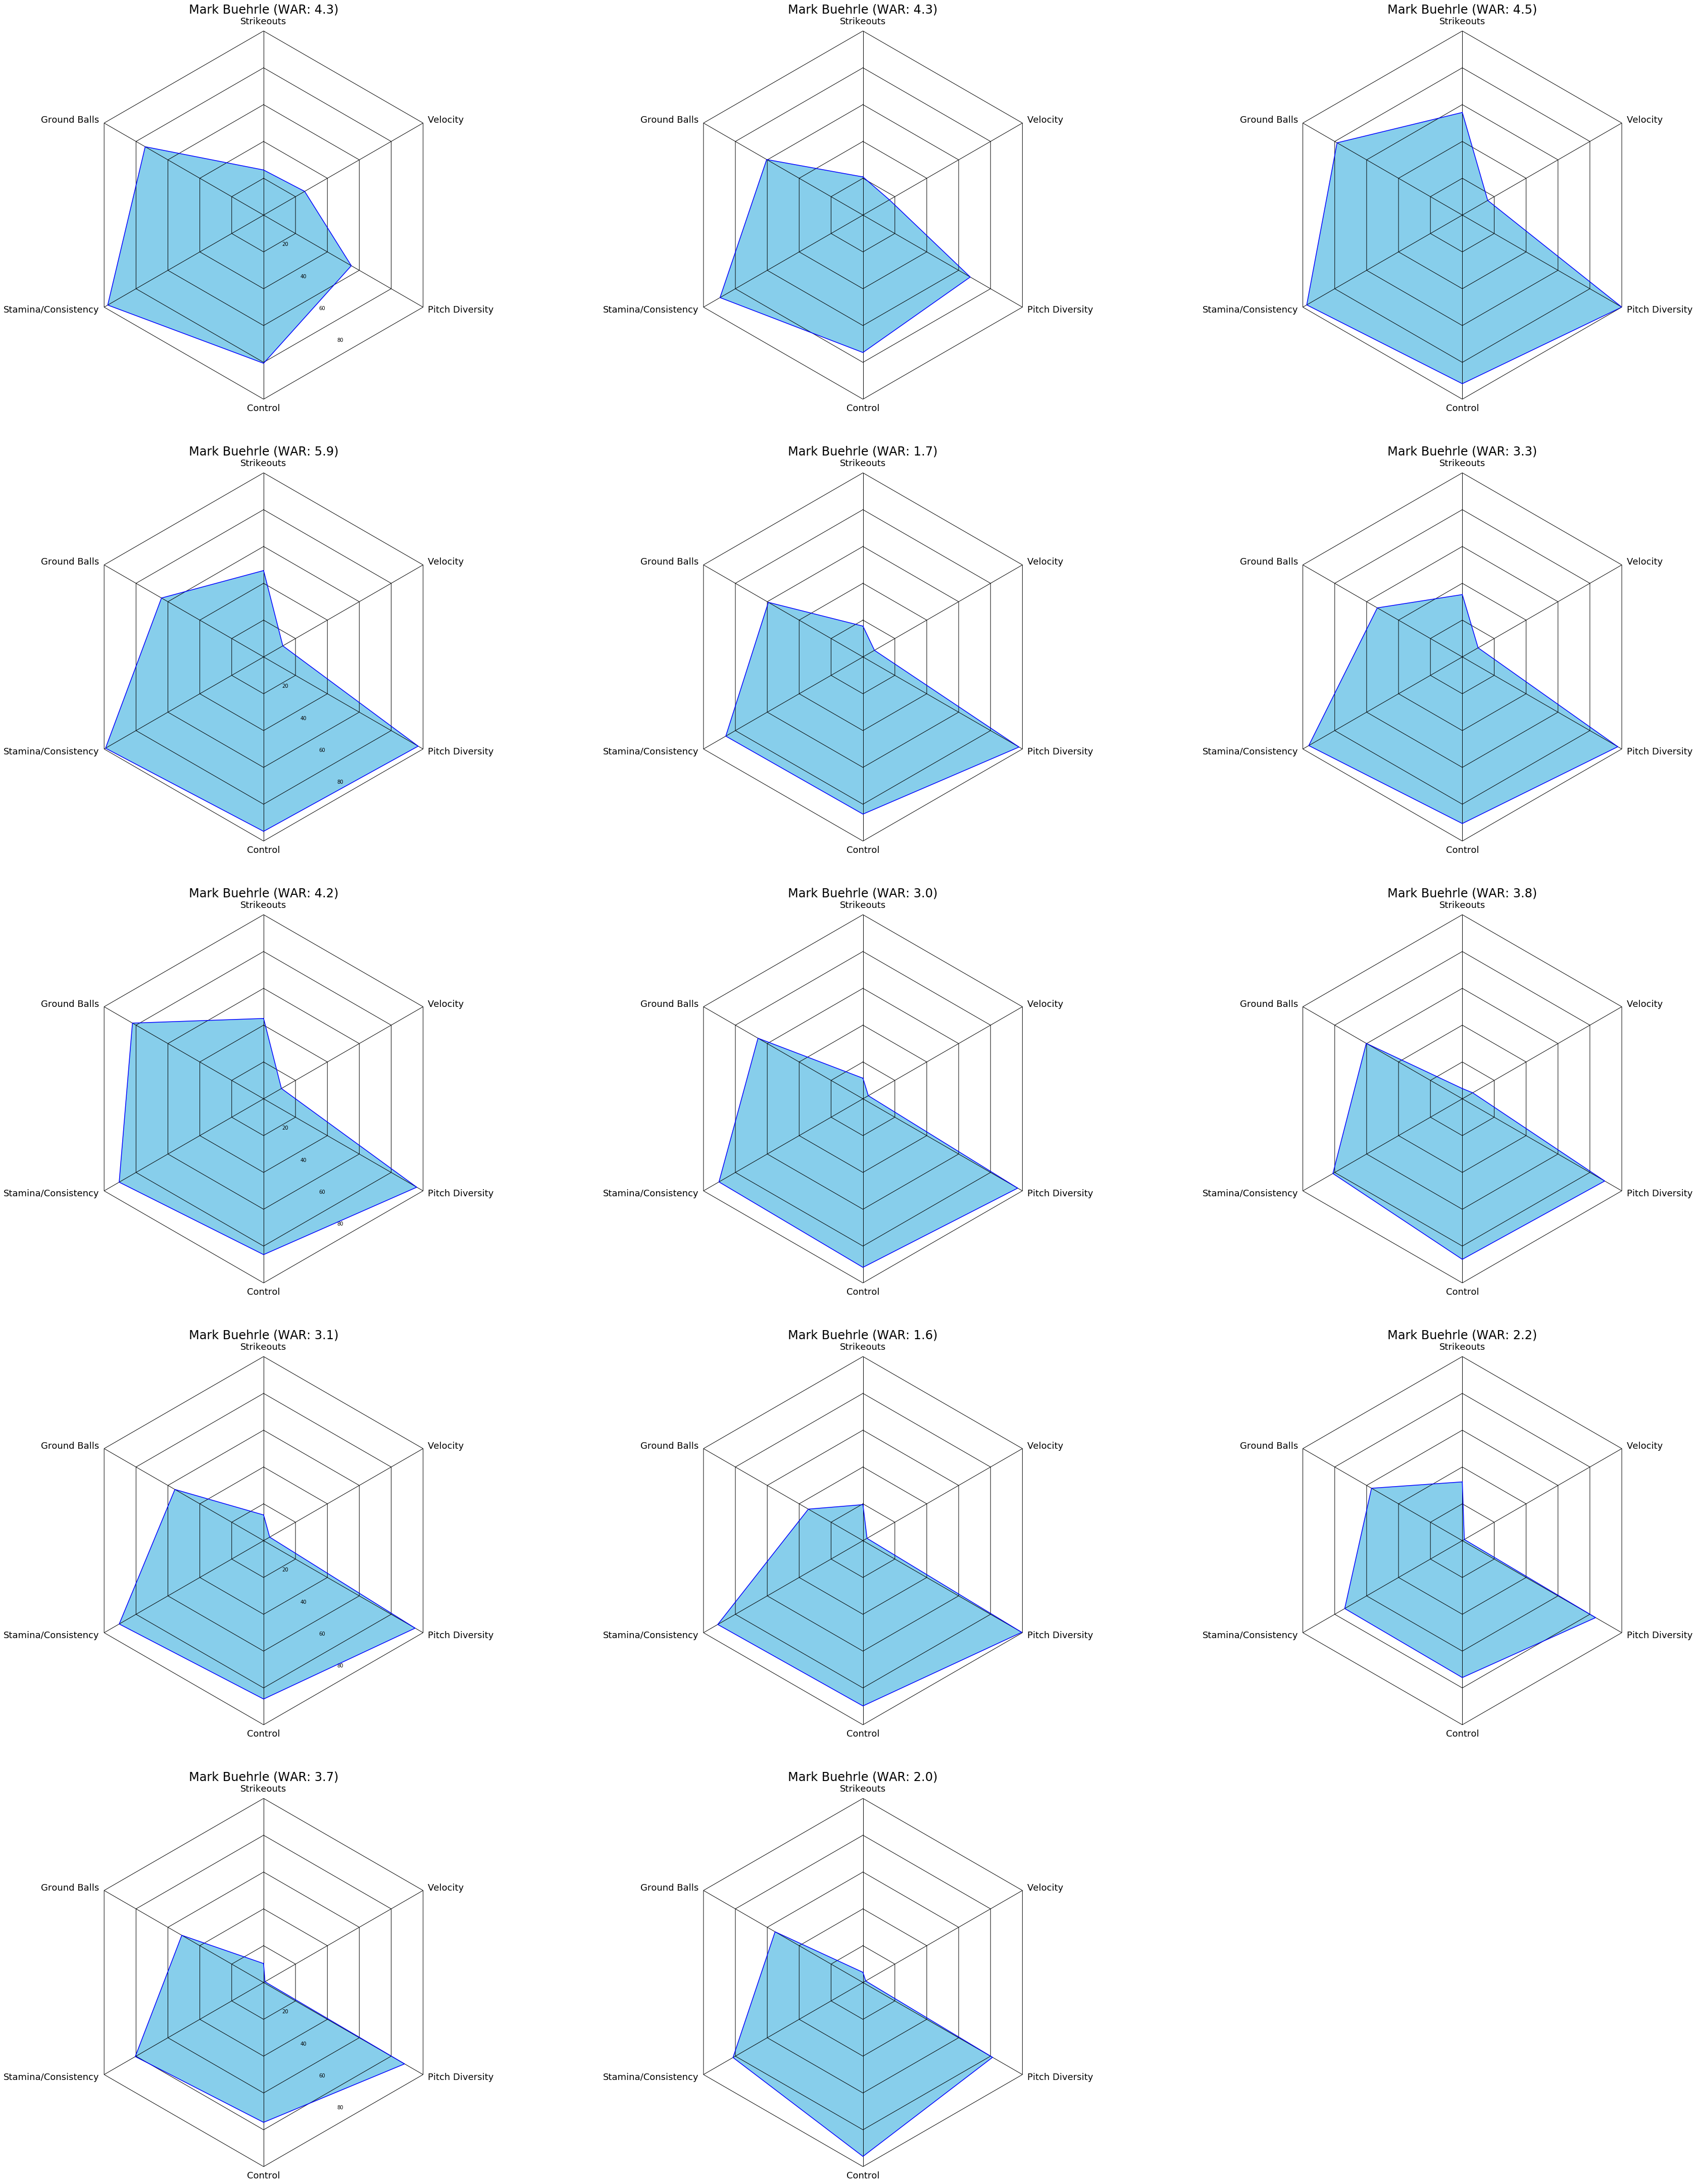

In [53]:
N = 6

x_as = [n / float(N) * 2 * pi for n in range(N)]

theta = radar(N, frame = 'polygon')
theta

# Set color of axes
plt.rc('axes', linewidth=1, edgecolor="black", facecolor = "white")

cols = 3
rows = (len(plotdf1)//3 + ((len(plotdf1)%3)//3)+1)

# Create polar plot
fig, ax = plt.subplots(rows, cols, figsize=(10*rows, 20*cols),
                       sharex = True, sharey= True, subplot_kw = dict(projection='radar'))
ax = ax.flat


# Set canvas colour
#fig.patch.set_facecolor('xkcd:mint green')
for j in range(len(plotdf1)):
    # Set data
    x = np.array(plotdf1.columns[1:-2].values)
    y = np.array(pd.to_numeric(plotdf1.iloc[j,1:-2].values))
    # Set clockwise rotation. That is:
    ax[j].set_theta_offset(pi / 2)
    ax[j].set_theta_direction(-1)
    plt.setp(ax[j], yticks = [20, 40, 60, 80], yticklabels = ["20", "40", "60", "80"])

    # Set position of radial-labels
    #ax.set_rticks([0, 20, 40, 60, 80, 100])
    ax[j].set_rlabel_position(150)


    # Set color and linestyle of grid
    ax[j].xaxis.grid(True, color="black", linestyle='solid', linewidth=1)
    ax[j].yaxis.grid(True, color="black", linestyle='solid', linewidth=1)


    # Set number of radial axes and remove labels
    plt.xticks(x_as[:], [])


    ax[j].plot(x_as, y, linewidth=1.5, color = 'b', linestyle='solid', zorder=3)
    # Fill area
    ax[j].fill(x_as, y, 'skyblue')

    # Set axes limits
    plt.ylim(0, 100)
    #plt.yticks([0, 20, 40, 60, 80, 100], ["0", "20", "40", "60", "80", "100"])
    
    # Add title
    ax[j].set_title(f'{plotdf1.loc[j, "Name"]} (WAR: {plotdf1.loc[j, "WAR"]})', position=(0.5, 1.05), 
                    size = 24, horizontalalignment='center', verticalalignment='center')
    
    # Adjust positioning of vertex labels based on their position from 0 - 2pi (circle)
    for i in range(N):
        # Calculate angles of the 6 vertices
        angle_rad = i / float(N) * 2 * pi
        # At top center
        if angle_rad == 0:
            ha, distance_ax = "center", 5
        # On right side
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 3
        # On bottom
        elif angle_rad == pi:
            ha, distance_ax = "center", 5
        # On left side
        else:
            ha, distance_ax = "right", 3
        # Insert the text @ the angle position
        ax[j].text(angle_rad, 100 + distance_ax, x[i], size=18, horizontalalignment=ha, verticalalignment="center")
    
# Remove any extra empty subplots
remainders = (rows*cols) - len(plotdf1)
if remainders > 0:
    for n in np.arange(1, remainders+1):
        fig.delaxes(ax[-n])
    
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
#plt.savefig(f'C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plot{timestr}.png')

In [29]:
remainders = (rows*cols) - len(plotdf1)

In [34]:
if remainders > 0:
    for n in np.arange(1, remainders+1):
        print(n)

1


In [39]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
print(timestr)

20200524-164326


In [ ]:
plt.figure()
for i in plotdf1['Age']:
    plt.plot(plotdf1['Age'],plotdf1['Strikeouts'], label = 'K')
    plt.plot(plotdf1['Age'],plotdf1['Velocity'], label = 'V')
    plt.plot(plotdf1['Age'],plotdf1['Control'], label = 'BB')
    plt.plot(plotdf1['Age'],plotdf1['Stamina/Consistency'], label = 'IP')
    plt.plot(plotdf1['Age'],plotdf1['Pitch Diversity'], label = 'Div')
    plt.plot(plotdf1['Age'],plotdf1['BA Against'], label = 'BA')
plt.xticks(np.arange(plotdf1['Age'].min(), plotdf1['Age'].max()+1,1))
plt.legend()
plt.show()

In [38]:
def isin(name):
    if name not in list(df['Name']):
        return False
    else:
        return True

In [39]:
status = isin('Clayton Kershaw')
status

True

In [37]:
'Boyang' not in list(df['Name'])

True

In [18]:
if isin == True:
    print('yes')
else:
    print('no')

True

In [ ]:
for column in pitches.columns[:-1]:
    plt.plot(pitches['Age'], pitches[column], label = column)
plt.ylim(0,101)
plt.legend()    
plt.show()

TypeError: 'MovieWriterRegistry' object is not an iterator

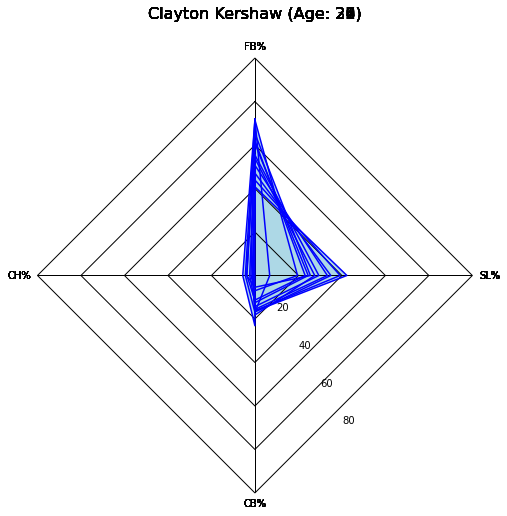

In [17]:
N = len(pitches.columns[:-1])

x_as = [n / float(N) * 2 * pi for n in range(N)]

theta = radar(N, frame = 'polygon')
theta

# Set color of axes
plt.rc('axes', linewidth=1, edgecolor="black", facecolor = "white")

ages = []
lines = []

# Create polar plot
fig, ax = plt.subplots(figsize=(8,8), sharex = True, sharey= True, subplot_kw = dict(projection='radar'))
#ax = ax.flat
plt.setp(ax, yticks = [20, 40, 60, 80], yticklabels = ["20", "40", "60", "80"])

# Set canvas colour
#fig.patch.set_facecolor('xkcd:mint green')
camera = Camera(fig)
for j in range(len(plotdf1)):
    # Set data
    x = np.array(pitches.columns[:-1])
    y = np.array(pd.to_numeric(pitches.iloc[j,:-1].values))
    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)


    # Set position of radial-labels
    #ax.set_rticks([0, 20, 40, 60, 80, 100])
    ax.set_rlabel_position(150)


    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="black", linestyle='solid', linewidth=1)
    ax.yaxis.grid(True, color="black", linestyle='solid', linewidth=1)


    # Set number of radial axes and remove labels
    plt.xticks(x_as[:], [])


    # Plot data
    line = plt.plot(x_as, y, linewidth=1.5, color = 'b', linestyle='solid', zorder=3)
    # Fill area
    ax.fill(x_as, y, 'lightblue', alpha=0.95)

    # Set axes limits
    plt.ylim(0, 100)
    #plt.yticks([0, 20, 40, 60, 80, 100], ["0", "20", "40", "60", "80", "100"])
    
    # Add title
    #ax.set_title(f'{plotdf11.loc[j, "Name"]} (WAR: {plotdf11.loc[j, "WAR"]})', position=(0.5, 1.05), horizontalalignment='center', verticalalignment='center')
    
    # Adjust positioning of vertex labels based on their position from 0 - 2pi (circle)
    for i in range(N):
        # Calculate angles of the 6 vertices
        angle_rad = i / float(N) * 2 * pi
        # At top center
        if angle_rad == 0:
            ha, distance_ax = "center", 5
        # On right side
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 3
        # On bottom
        elif angle_rad == pi:
            ha, distance_ax = "center", 5
        # On left side
        else:
            ha, distance_ax = "right", 3
        # Insert the text @ the angle position
        ax.text(angle_rad, 100 + distance_ax, x[i], size=10, horizontalalignment=ha, verticalalignment="center")
    
    ax.text(0.5, 1.1, f'{plotdf1.loc[j, "Name"]} (Age: {plotdf1.loc[j, "Age"]})', size = 16, transform=ax.transAxes,
            horizontalalignment='center', verticalalignment="center")
    camera.snap()
                 
                 
animation = camera.animate()
animation.save('pitches.gif', fps=0.5)
# HTML(animation.to_html5_video())
# Show polar plot
# plt.show()

In [19]:
!pip install ffmpeg-python

  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491062 sha256=face56551fefc0d776e0898d41a8e22f8252eacfe32f05ec89a057da10a7ae6e
  Stored in directory: c:\users\boyang qiu\appdata\local\pip\cache\wheels\8e\70\28\3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built future
